In [125]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Final_BDAS_Itr').getOrCreate()

In [126]:
df1 = spark.read.csv('cardio_part1.csv', inferSchema=True, header=True)

df2 = spark.read.csv('cardio_part2.csv', inferSchema=True, header=True)

In [127]:
print((df1.count(), len(df1.columns)))

(40000, 13)


In [128]:
df1.show(15)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [129]:
print((df2.count(), len(df2.columns)))

(30000, 13)


In [130]:
df2.show(15)

+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|   id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|57183|14347|     2|   170|  79.0|  120|   70|          1|   1|    1|   0|     1|     0|
|57184|20393|     1|   153|  72.0|  119|   86|          1|   1|    0|   0|     1|     1|
|57185|19705|     1|   159|  74.0|  110|   70|          1|   1|    0|   0|     1|     0|
|57186|18238|     2|   168|  65.0|  140|   90|          2|   2|    0|   0|     0|     1|
|57187|19553|     2|   172|  84.0|  120|   80|          1|   1|    0|   0|     1|     1|
|57189|19072|     1|   165|  70.0|  140|   90|          2|   2|    0|   0|     1|     1|
|57191|21800|     1|   158| 105.0|  130|   80|          1|   1|    0|   0|     0|     0|
|57192|17475|     2|   180|  83.0|  120|   80|          1|   1|    0|   0|     1|     0|
|57194|18922|     1| 

In [131]:
# union of rows in this frame and another frame

df = df1.union(df2)

In [132]:
print((df.count(), len(df.columns)))

(70000, 13)


In [133]:
df.show(20)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [134]:
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|summary|                id|               age|            gender|            height|            weight|            ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|            cardio|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|  count|             70000|             70000|             70000|             70000|             70000|            70000|             70000|             70000|             70000|              70000|               70000|   

In [135]:
df.head(5)

[Row(id=0, age=18393, gender=2, height=168, weight=62.0, ap_hi=110, ap_lo=80, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, cardio=0),
 Row(id=1, age=20228, gender=1, height=156, weight=85.0, ap_hi=140, ap_lo=90, cholesterol=3, gluc=1, smoke=0, alco=0, active=1, cardio=1),
 Row(id=2, age=18857, gender=1, height=165, weight=64.0, ap_hi=130, ap_lo=70, cholesterol=3, gluc=1, smoke=0, alco=0, active=0, cardio=1),
 Row(id=3, age=17623, gender=2, height=169, weight=82.0, ap_hi=150, ap_lo=100, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, cardio=1),
 Row(id=4, age=17474, gender=1, height=156, weight=56.0, ap_hi=100, ap_lo=60, cholesterol=1, gluc=1, smoke=0, alco=0, active=0, cardio=0)]

In [136]:
type(df.columns)
df.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [137]:
df.dtypes

[('id', 'int'),
 ('age', 'int'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('cardio', 'int')]

In [138]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [139]:
df.select('age', 'gender').columns

['age', 'gender']

In [140]:
['age', 'gender']

['age', 'gender']

In [141]:
df.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [142]:
from pyspark.sql.functions import col,sum

df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [143]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [144]:
df_null = spark.read.csv('cardio_null.csv', inferSchema=True, header=True)

In [145]:
print((df_null.count(), len(df_null.columns)))

(40005, 13)


In [146]:
from pyspark.sql.functions import col,sum

df_null.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df_null.columns)).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  3|     3|     3|     4|    3|    4|          5|   3|    4|   4|     2|     3|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [147]:
from pyspark.sql.functions import isnan, when, count, col

df_null.select([count(when(isnan(c), c)).alias(c) for c in df_null.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [148]:
df_null.na.drop().count()

40000

In [149]:
df_no_null = df_null.na.drop()

In [150]:
print((df_no_null.count(), len(df_no_null.columns)))

(40000, 13)


In [151]:
df.describe('ap_hi').show()
df.describe('ap_lo').show()

+-------+-----------------+
|summary|            ap_hi|
+-------+-----------------+
|  count|            70000|
|   mean|128.8172857142857|
| stddev|154.0114194560912|
|    min|             -150|
|    max|            16020|
+-------+-----------------+

+-------+------------------+
|summary|             ap_lo|
+-------+------------------+
|  count|             70000|
|   mean| 96.63041428571428|
| stddev|188.47253029638944|
|    min|               -70|
|    max|             11000|
+-------+------------------+



In [152]:
df = df.filter((df.ap_hi <= 300) & (df.ap_lo <= 200))
df = df.filter((df.ap_hi >= 20) & (df.ap_lo >= 5))

In [153]:
print((df.count(), len(df.columns)))

(68814, 13)


In [154]:
df.describe('ap_hi').show()
df.describe('ap_lo').show()

+-------+------------------+
|summary|             ap_hi|
+-------+------------------+
|  count|             68814|
|   mean|126.60618478797919|
| stddev| 16.79058368777753|
|    min|                20|
|    max|               240|
+-------+------------------+

+-------+-----------------+
|summary|            ap_lo|
+-------+-----------------+
|  count|            68814|
|   mean|81.35082977301131|
| stddev|9.788861568900998|
|    min|                6|
|    max|              190|
+-------+-----------------+



In [155]:
df = df.drop('id')

In [156]:
df.columns

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [157]:
df.show(10)

+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
|17668|     1|   158|  71.0|  110|   70|          1|   1|    0|   0|     1|     0|
|198

In [158]:
df = df.withColumn('bmi',  df["weight"]/(df["height"]/100)**2 )

In [159]:
df.columns

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'bmi']

In [160]:
COLUMNS = ['age', 'gender', 'height', 'weight', 
           'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 
           'alco', 'active', 'bmi', 'cardio' ]
df = df.select(COLUMNS)
df.first()

Row(age=18393, gender=2, height=168, weight=62.0, ap_hi=110, ap_lo=80, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, bmi=21.9671201814059, cardio=0)

In [161]:
df.show(10)

+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|
+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|
|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|
|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|23.507805325987146|     1|
|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1| 28.71047932495361|     1|
|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|23.011176857330703|     0|
|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|29.384676110696898|     0|
|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1| 37.729

In [162]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cardio: integer (nullable = true)



In [163]:
df.columns

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bmi',
 'cardio']

In [164]:
df.describe('bmi').show()

+-------+-----------------+
|summary|              bmi|
+-------+-----------------+
|  count|            68814|
|   mean|27.52445730048036|
| stddev|6.067480028035472|
|    min|3.471783865673526|
|    max|298.6666666666667|
+-------+-----------------+



In [165]:
df.select('age').show(15)

+-----+
|  age|
+-----+
|18393|
|20228|
|18857|
|17623|
|17474|
|21914|
|22113|
|22584|
|17668|
|19834|
|22530|
|18815|
|14791|
|19809|
|14532|
+-----+
only showing top 15 rows



In [166]:
df = df.withColumn('age',  df["age"]/365 )

In [167]:
df.select('age').show(15)

+------------------+
|               age|
+------------------+
|50.391780821917806|
| 55.41917808219178|
| 51.66301369863014|
| 48.28219178082192|
| 47.87397260273973|
|60.038356164383565|
|60.583561643835615|
| 61.87397260273973|
| 48.40547945205479|
| 54.33972602739726|
|61.726027397260275|
| 51.54794520547945|
| 40.52328767123288|
|54.271232876712325|
| 39.81369863013698|
+------------------+
only showing top 15 rows



In [168]:
df.printSchema()

root
 |-- age: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cardio: integer (nullable = true)



In [169]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+-----------------+-------------------+
|summary|               age|             gender|            height|            weight|             ap_hi|            ap_lo|       cholesterol|             gluc|              smoke|                alco|             active|              bmi|             cardio|
+-------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+--------------------+-------------------+-----------------+-------------------+
|  count|             68814|              68814|             68814|             68814|             68814|            68814|             68814|            68814|              68814|               68814|              68814

In [170]:
df.show(2)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
only showing top 2 rows



In [171]:
##  Data Transformation --> 0 to 1




In [172]:
import numpy as np
from pyspark.sql import functions as F
from pyspark.sql import SQLContext

from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

In [173]:
df_new = df
df_new.show(15)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|
| 51.66301369863014|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|23.507805325987146|     1|
| 48.28219178082192|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1| 28.71047932495361|     1|
| 47.87397260273973|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|23.011176857330703|     0|
|60.038356164383565|     1|   151|  67.0|  120|   80|          2|   2|    0|   0

In [174]:
["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc",
               "smoke", "alco", "active", "cardio_Catg"]

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio_Catg']

In [175]:
assembler = VectorAssembler().setInputCols\
            (df_new.columns).setOutputCol("features")
transformed = assembler.transform(df_new)
scaler = MinMaxScaler(inputCol="features",\
         outputCol="scaledFeatures")
scalerModel =  scaler.fit(transformed.select("features"))
scaledData = scalerModel.transform(transformed)

In [176]:
type(scaledData)

pyspark.sql.dataframe.DataFrame

In [177]:
scaledData.show(10)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|            features|      scaledFeatures|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|[50.3917808219178...|[0.58807588075880...|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|[55.4191780821917...|[0.73015873015873...|
| 51.66301369863014|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|23.507805325987146|     1|[51.6630136986301...|[0.62400309717382...|
| 48.28219178082192|     2|   169|  82.0|  150|  100|     

In [178]:
# def extract(row):
#     return (row.pmid, )+tuple(row.scaledFeatures.toArray().tolist())

# final_data = scaledData.select("pmid","scaledFeatures").rdd\
#                .map(extract).toDF(df.columns)

In [179]:
# type(assembler)

In [180]:
scaledData.select('scaledFeatures').head(2)

[Row(scaledFeatures=DenseVector([0.5881, 1.0, 0.5795, 0.2698, 0.4091, 0.4022, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0627, 0.0])),
 Row(scaledFeatures=DenseVector([0.7302, 0.0, 0.5179, 0.3915, 0.5455, 0.4565, 1.0, 0.0, 0.0, 0.0, 1.0, 0.1066, 1.0]))]

In [181]:
# To demonstrate Scaling

In [182]:
# df_minmax_1 =df

In [183]:
# df_minmax_1.show(5)

In [184]:
# from pyspark.ml import Pipeline
# from pyspark.ml.feature import MinMaxScaler
# from pyspark.ml.feature import VectorAssembler

# columns_to_scale = df_minmax_1.columns
# assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
# scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
# pipeline = Pipeline(stages=assemblers + scalers)
# scalerModel = pipeline.fit(df_minmax_1)
# scaledData_22 = scalerModel.transform(df_minmax_1)

In [185]:
# scaledData_22.show(5)

In [186]:
# from pyspark.sql import functions as f
# names = {x + "_scaled": x for x in columns_to_scale}
# scaledData_22 = scaledData_22.select([f.col(c).alias(names[c]) for c in names.keys()])

In [187]:
# scaledData_22.show(10)

In [188]:
# type(scaledData_22)

In [189]:
## Feature Selection



In [190]:
df_feature = scaledData
df_feature.show(5)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|            features|      scaledFeatures|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|[50.3917808219178...|[0.58807588075880...|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|[55.4191780821917...|[0.73015873015873...|
| 51.66301369863014|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|23.507805325987146|     1|[51.6630136986301...|[0.62400309717382...|
| 48.28219178082192|     2|   169|  82.0|  150|  100|     

In [191]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors


selector = ChiSqSelector(numTopFeatures=8, featuresCol="scaledFeatures",
                         outputCol="selectedFeatures", labelCol="cardio")

final_df = selector.fit(df_feature).transform(df_feature)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
final_df.show(5)

ChiSqSelector output with top 8 features selected
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+--------------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|            features|      scaledFeatures|    selectedFeatures|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+--------------------+--------------------+--------------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|[50.3917808219178...|[0.58807588075880...|[0.58807588075880...|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|[55.4191780821917...|[0.73015873015873...|[0.73015873015873...|
| 51.66301369863014|     1|   165|  64.0|  130|   70|       

In [192]:
final_df.head().selectedFeatures

DenseVector([0.5881, 0.2698, 0.4091, 0.4022, 0.0, 0.0, 1.0, 0.0627])

In [193]:
# DenseVector([18.0])
# >>> model.selectedFeatures

In [194]:
final_df.selectedFeatures

Column<b'selectedFeatures'>

In [195]:
final_df.select('selectedFeatures').head(4)

[Row(selectedFeatures=DenseVector([0.5881, 0.2698, 0.4091, 0.4022, 0.0, 0.0, 1.0, 0.0627])),
 Row(selectedFeatures=DenseVector([0.7302, 0.3915, 0.5455, 0.4565, 1.0, 0.0, 1.0, 0.1066])),
 Row(selectedFeatures=DenseVector([0.624, 0.2804, 0.5, 0.3478, 1.0, 0.0, 0.0, 0.0679])),
 Row(selectedFeatures=DenseVector([0.5285, 0.3757, 0.5909, 0.5109, 0.0, 0.0, 1.0, 0.0855]))]

In [196]:
df_feature.head(4)

[Row(age=50.391780821917806, gender=2, height=168, weight=62.0, ap_hi=110, ap_lo=80, cholesterol=1, gluc=1, smoke=0, alco=0, active=1, bmi=21.9671201814059, cardio=0, features=DenseVector([50.3918, 2.0, 168.0, 62.0, 110.0, 80.0, 1.0, 1.0, 0.0, 0.0, 1.0, 21.9671, 0.0]), scaledFeatures=DenseVector([0.5881, 1.0, 0.5795, 0.2698, 0.4091, 0.4022, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0627, 0.0])),
 Row(age=55.41917808219178, gender=1, height=156, weight=85.0, ap_hi=140, ap_lo=90, cholesterol=3, gluc=1, smoke=0, alco=0, active=1, bmi=34.927679158448385, cardio=1, features=DenseVector([55.4192, 1.0, 156.0, 85.0, 140.0, 90.0, 3.0, 1.0, 0.0, 0.0, 1.0, 34.9277, 1.0]), scaledFeatures=DenseVector([0.7302, 0.0, 0.5179, 0.3915, 0.5455, 0.4565, 1.0, 0.0, 0.0, 0.0, 1.0, 0.1066, 1.0])),
 Row(age=51.66301369863014, gender=1, height=165, weight=64.0, ap_hi=130, ap_lo=70, cholesterol=3, gluc=1, smoke=0, alco=0, active=0, bmi=23.507805325987146, cardio=1, features=DenseVector([51.663, 1.0, 165.0, 64.0, 130.0, 70.0, 3.

In [197]:
# selected features

# 0, 3, 4, 5, 6, 7, 8, 11
['age' , 'weight' , 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'bmi']

['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'bmi']

In [198]:
# Train and Test sets

In [199]:
# train_data, test_data = final_df.randomSplit([0.7,0.3])

train_data, test_data = final_df.randomSplit([0.8,0.2])

In [200]:
print("Train Data Count: " + str(train_data.count()))

train_data.groupby('cardio').agg({'cardio': 'count'}).show()

Train Data Count: 55237
+------+-------------+
|cardio|count(cardio)|
+------+-------------+
|     1|        27343|
|     0|        27894|
+------+-------------+



In [201]:
print("Test Data Count: " + str(test_data.count()))

test_data.groupby('cardio').agg({'cardio': 'count'}).show()

Test Data Count: 13577
+------+-------------+
|cardio|count(cardio)|
+------+-------------+
|     1|         6715|
|     0|         6862|
+------+-------------+



In [202]:
# from pyspark.ml.classification import LogisticRegression
# # from pyspark.ml import Pipeline

# log_reg = LogisticRegression(featuresCol='selectedFeatures',labelCol='cardio')

# # pipeline_log_reg = Pipeline(stages=[log_reg])

In [203]:
from pyspark.ml.classification import LogisticRegression

log_reg = LogisticRegression(featuresCol='selectedFeatures',labelCol='cardio')

fit_model_log_reg = log_reg.fit(train_data)

results_log_reg = fit_model_log_reg.transform(test_data)


In [204]:
results_log_reg.printSchema()

root
 |-- age: double (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cardio: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)
 |-- selectedFeatures: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [205]:
# results_log_reg.select('cardio','prediction').show()

results_log_reg.select('cardio','prediction', 'probability').show()

+------+----------+--------------------+
|cardio|prediction|         probability|
+------+----------+--------------------+
|     0|       0.0|[0.87305066997705...|
|     0|       0.0|[0.79503586641363...|
|     0|       0.0|[0.69188934989577...|
|     0|       0.0|[0.97119785710497...|
|     0|       0.0|[0.87991038921897...|
|     0|       0.0|[0.76800931818267...|
|     0|       0.0|[0.94311445730618...|
|     0|       0.0|[0.88352732526268...|
|     0|       0.0|[0.94041228876610...|
|     0|       0.0|[0.83184501860006...|
|     0|       0.0|[0.88714598017638...|
|     0|       0.0|[0.89049777502809...|
|     0|       0.0|[0.82383214801809...|
|     0|       0.0|[0.77640215533570...|
|     0|       0.0|[0.79731746635854...|
|     1|       1.0|[0.46311778144841...|
|     0|       0.0|[0.64856619617287...|
|     0|       0.0|[0.88461116057655...|
|     0|       0.0|[0.87622100406821...|
|     1|       0.0|[0.65038468311301...|
+------+----------+--------------------+
only showing top

In [206]:
cm = results_log_reg.select("cardio", "prediction")
cm.groupby('cardio').agg({'cardio': 'count'}).show()
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+------+-------------+
|cardio|count(cardio)|
+------+-------------+
|     1|         6715|
|     0|         6862|
+------+-------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|             7578|
|       1.0|             5999|
+----------+-----------------+



In [207]:
# Compute accuraccy 

log_reg_acc = cm.filter(cm.cardio == cm.prediction).count() / cm.count()
print("Logistic Model accuracy: %.3f%%" % (log_reg_acc * 100))

Logistic Model accuracy: 72.468%


In [208]:
# Evaluate the model using the binary classifer.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

log_reg_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='cardio')

AUC_log_reg = log_reg_eval.evaluate(results_log_reg)

AUC_log_reg

0.724078118716542

In [209]:
# Evaluate using MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error

from pyspark.ml.evaluation import MulticlassClassificationEvaluator


log_reg_evaluator = MulticlassClassificationEvaluator(
    labelCol="cardio", predictionCol="prediction", metricName="accuracy")
log_reg_accuracy = log_reg_evaluator.evaluate(results_log_reg)

print("Log reg Test Error = %g " % (1.0 - log_reg_accuracy))
print("Log reg accurracy = %g " % (log_reg_accuracy))


Log reg Test Error = 0.275319 
Log reg accurracy = 0.724681 


In [210]:
# # Print the coefficients and intercept for logistic regression
# print("Coefficients: " + str(log_reg.fit(train_data).coefficients))
# print("Intercept: " + str(log_reg.fit(train_data).intercept))

In [211]:
# Print the coefficients and intercept for logistic regression

print("Coefficients: " + str(fit_model_log_reg.coefficients))
print("Intercept: " + str(fit_model_log_reg.intercept))

Coefficients: [1.8522768618618202,1.4811892252095573,11.759049021283166,2.9558176250384265,1.0106429399352355,-0.24014104856989618,-0.24836455334956617,1.6896764258481238]
Intercept: -8.712250861865696


In [212]:
# selected features

['age' , 'weight' , 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'bmi']

['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'bmi']

In [213]:
type(fit_model_log_reg.summary)
print(fit_model_log_reg.summary.roc)

DataFrame[FPR: double, TPR: double]


In [214]:
# import matplotlib.pyplot as plt
# import numpy as np

# trainingSummary = log_reg.fit(train_data).summary
# roc = trainingSummary.roc.toPandas()
# plt.plot(roc['FPR'],roc['TPR'])
# plt.ylabel('False Positive Rate')
# plt.xlabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()
# print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

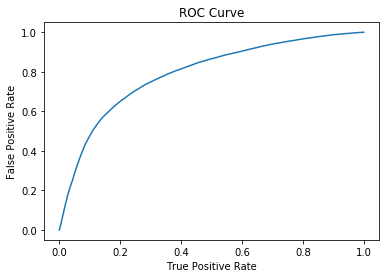

In [215]:
import matplotlib.pyplot as plt
import numpy as np

trainingSummary = log_reg.fit(train_data).summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

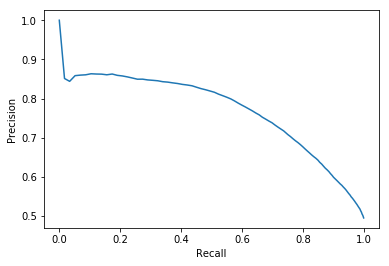

In [216]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [217]:
df_new.show(10)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|
| 51.66301369863014|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|23.507805325987146|     1|
| 48.28219178082192|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1| 28.71047932495361|     1|
| 47.87397260273973|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|23.011176857330703|     0|
|60.038356164383565|     1|   151|  67.0|  120|   80|          2|   2|    0|   0

In [218]:
df_encode = df_new

In [219]:
from pyspark.ml.feature import VectorIndexer, OneHotEncoder

gender_encoder = OneHotEncoder(inputCol='gender',outputCol='gender_Catg').transform(df_encode)
cholesterol_encoder = OneHotEncoder(inputCol='cholesterol',outputCol='cholesterol_Catg').transform(gender_encoder)
gluc_encoder = OneHotEncoder(inputCol='gluc',outputCol='gluc_Catg').transform(cholesterol_encoder)
smoke_encoder = OneHotEncoder(inputCol='smoke',outputCol='smoke_Catg').transform(gluc_encoder)
alco_encoder = OneHotEncoder(inputCol='alco',outputCol='alco_Catg').transform(smoke_encoder)
active_encoder = OneHotEncoder(inputCol='active',outputCol='active_Catg').transform(alco_encoder)
cardio_encoder = OneHotEncoder(inputCol='cardio',outputCol='cardio_Catg').transform(active_encoder)

cardio_encoder.show(10)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+-------------+----------------+-------------+-------------+-------------+-------------+-------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|               bmi|cardio|  gender_Catg|cholesterol_Catg|    gluc_Catg|   smoke_Catg|    alco_Catg|  active_Catg|  cardio_Catg|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+------------------+------+-------------+----------------+-------------+-------------+-------------+-------------+-------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|  21.9671201814059|     0|    (2,[],[])|   (3,[1],[1.0])|(3,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|    (1,[],[])|(1,[0],[1.0])|
| 55.41917808219178|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|34.927679158448385|     1|(2,[1],[1.0])|       (

In [220]:
cardio_encoder.dtypes

[('age', 'double'),
 ('gender', 'int'),
 ('height', 'int'),
 ('weight', 'double'),
 ('ap_hi', 'int'),
 ('ap_lo', 'int'),
 ('cholesterol', 'int'),
 ('gluc', 'int'),
 ('smoke', 'int'),
 ('alco', 'int'),
 ('active', 'int'),
 ('bmi', 'double'),
 ('cardio', 'int'),
 ('gender_Catg', 'vector'),
 ('cholesterol_Catg', 'vector'),
 ('gluc_Catg', 'vector'),
 ('smoke_Catg', 'vector'),
 ('alco_Catg', 'vector'),
 ('active_Catg', 'vector'),
 ('cardio_Catg', 'vector')]

In [221]:
from pyspark.ml.feature import VectorIndexer, OneHotEncoder

df_encode = df_new
gender_encoder = OneHotEncoder(inputCol='gender',outputCol='gender_Catg')
cholesterol_encoder = OneHotEncoder(inputCol='cholesterol',outputCol='cholesterol_Catg')
gluc_encoder = OneHotEncoder(inputCol='gluc',outputCol='gluc_Catg')
smoke_encoder = OneHotEncoder(inputCol='smoke',outputCol='smoke_Catg')
alco_encoder = OneHotEncoder(inputCol='alco',outputCol='alco_Catg')
active_encoder = OneHotEncoder(inputCol='active',outputCol='active_Catg')
cardio_encoder = OneHotEncoder(inputCol='cardio',outputCol='cardio_Catg')


from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["age", "gender_Catg", "height", "weight", "ap_hi", "ap_lo", "cholesterol_Catg", "gluc_Catg",
               "smoke_Catg", "alco_Catg", "active_Catg", "bmi"], outputCol="features")


from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[gender_encoder, cholesterol_encoder, gluc_encoder, smoke_encoder, alco_encoder, active_encoder, cardio_encoder, assembler])
encode_model = pipeline.fit(df_encode)
df_encode_transformed = encode_model.transform(df_encode)

df_encode_transformed.show(1)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+----------------+------+-----------+----------------+-------------+-------------+-------------+-----------+-------------+--------------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|             bmi|cardio|gender_Catg|cholesterol_Catg|    gluc_Catg|   smoke_Catg|    alco_Catg|active_Catg|  cardio_Catg|            features|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+----------------+------+-----------+----------------+-------------+-------------+-------------+-----------+-------------+--------------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|21.9671201814059|     0|  (2,[],[])|   (3,[1],[1.0])|(3,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|  (1,[],[])|(1,[0],[1.0])|(17,[0,3,4,5,6,8,...|
+------------------+------+------+------+-----+-----+-----------+----+-----+

In [222]:
data = df_encode_transformed
data.show(1)

+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+----------------+------+-----------+----------------+-------------+-------------+-------------+-----------+-------------+--------------------+
|               age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|             bmi|cardio|gender_Catg|cholesterol_Catg|    gluc_Catg|   smoke_Catg|    alco_Catg|active_Catg|  cardio_Catg|            features|
+------------------+------+------+------+-----+-----+-----------+----+-----+----+------+----------------+------+-----------+----------------+-------------+-------------+-------------+-----------+-------------+--------------------+
|50.391780821917806|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|21.9671201814059|     0|  (2,[],[])|   (3,[1],[1.0])|(3,[1],[1.0])|(1,[0],[1.0])|(1,[0],[1.0])|  (1,[],[])|(1,[0],[1.0])|(17,[0,3,4,5,6,8,...|
+------------------+------+------+------+-----+-----+-----------+----+-----+

In [223]:
# Split the data into training and test sets (30% held out for testing)
(train_data, test_data) = data.randomSplit([0.8, 0.2])

In [224]:

from pyspark.ml.classification import DecisionTreeClassifier

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="cardio", featuresCol="features", maxDepth=5)
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

In [225]:
print(dt_model)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_46889ba058c1b765414d) of depth 5 with 63 nodes


In [226]:
# Select example rows to display for predictions.
dt_predictions.select("cardio", "prediction").show()


+------+----------+
|cardio|prediction|
+------+----------+
|     0|       0.0|
|     1|       1.0|
|     0|       0.0|
|     1|       1.0|
|     1|       1.0|
|     0|       0.0|
|     1|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     0|       1.0|
+------+----------+
only showing top 20 rows



In [227]:
# Select (prediction, true label) and compute test error
dt_evaluator = MulticlassClassificationEvaluator(
    labelCol="cardio", predictionCol="prediction", metricName="accuracy")
dt_accuracy = dt_evaluator.evaluate(dt_predictions)
print("DT Test Error = %g " % (1.0 - dt_accuracy))
print("DT Test Accurracy = %g%%" % (dt_accuracy))

DT Test Error = 0.271262 
DT Test Accurracy = 0.728738%


In [228]:
print(dt_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_46889ba058c1b765414d) of depth 5 with 63 nodes
  If (feature 5 <= 128.0)
   If (feature 0 <= 54.95342465753425)
    If (feature 8 in {0.0})
     If (feature 9 in {0.0})
      If (feature 11 in {0.0})
       Predict: 0.0
      Else (feature 11 not in {0.0})
       Predict: 1.0
     Else (feature 9 not in {0.0})
      If (feature 16 <= 26.672763298277697)
       Predict: 0.0
      Else (feature 16 > 26.672763298277697)
       Predict: 0.0
    Else (feature 8 not in {0.0})
     If (feature 0 <= 43.942465753424656)
      If (feature 5 <= 119.0)
       Predict: 0.0
      Else (feature 5 > 119.0)
       Predict: 0.0
     Else (feature 0 > 43.942465753424656)
      If (feature 5 <= 119.0)
       Predict: 0.0
      Else (feature 5 > 119.0)
       Predict: 0.0
   Else (feature 0 > 54.95342465753425)
    If (feature 8 in {0.0})
     If (feature 9 in {1.0})
      If (feature 5 <= 111.0)
       Predict: 0.0
      Else (feature 5 > 111.0)


In [229]:
dt_cm = dt_predictions.select("cardio", "prediction")
dt_cm.groupby('cardio').agg({'cardio': 'count'}).show()
dt_cm.groupby('prediction').agg({'prediction': 'count'}).show()

+------+-------------+
|cardio|count(cardio)|
+------+-------------+
|     1|         6711|
|     0|         6940|
+------+-------------+

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|             7667|
|       1.0|             5984|
+----------+-----------------+

